In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC

from helpers import visualize_data, collect_results

In [2]:
pd.options.display.max_rows = None

In [3]:
# change to True to run the experiments with the sex labels.
run_experiment_with_sex_labels = False

In [4]:
def select_videos(data_frame):
    """Selects which videos to use. 
    
    The list of videos is obtained from "Deception Detection in Videos" paper.
    """
    with open('data/video_list.txt') as f:
        used_videos = f.readlines()
        used_videos = [x.strip() for x in used_videos]
        data_frame = data_frame.query("id in @used_videos")
    return data_frame

# Read IDT features

In [5]:
# features from the popular DARE paper
df_idt = pd.read_csv('data/mbh_features_of_dare.csv', index_col=0)

display(df_idt)

,id,0,1,2,3,4,5,6,7,8,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,trial_lie_001.mp4,1.081300e-02,7.284400e-03,8.687900e-03,-6.777200e-03,-9.307400e-03,9.563700e-03,-4.992800e-03,-3.437000e-03,7.628400e-03,...,0.006988,0.006860,0.008365,0.007864,0.005781,0.011365,-0.002816,-0.005027,0.006457,0.009784
1,trial_lie_002.mp4,2.133100e-04,1.906300e-04,-1.275500e-04,-1.055900e-04,1.946900e-04,1.034300e-04,-1.283000e-04,-2.628000e-04,1.580500e-04,...,0.024578,0.046221,0.025676,-0.026127,-0.042520,0.014131,-0.031927,0.031870,-0.044721,0.005578
2,trial_lie_003.mp4,6.088500e-05,4.812900e-05,3.026700e-05,-4.530000e-05,4.913400e-05,4.181100e-05,4.355900e-05,-6.368100e-05,3.522700e-05,...,0.024625,0.054589,0.040512,-0.034395,-0.053304,-0.029859,-0.044803,-0.031340,-0.054289,0.010178
3,trial_lie_004.mp4,1.024000e-04,6.879700e-05,7.461300e-05,1.293300e-04,6.741800e-05,-5.733300e-05,-8.373900e-05,-1.654700e-04,3.968100e-05,...,-0.006685,0.036857,0.018166,-0.015368,-0.043301,0.011812,0.015140,0.031948,-0.040518,-0.020500
4,trial_lie_005.mp4,1.424400e-03,2.760400e-03,-2.554200e-03,8.698200e-04,1.191800e-03,-1.893400e-03,-2.468200e-03,-1.024900e-03,1.854700e-03,...,0.018118,0.039617,0.028937,-0.019814,-0.042643,-0.008965,-0.033853,0.033104,-0.044586,0.026351
5,trial_lie_006.mp4,1.359900e-02,9.861800e-03,-1.952800e-02,1.154300e-02,7.932800e-03,-2.112100e-02,-1.138700e-02,-9.143600e-03,1.159000e-02,...,0.020937,0.037227,0.023773,-0.019086,-0.038060,-0.022599,-0.021236,0.028687,-0.038366,0.024186
6,trial_lie_007.mp4,1.168300e-02,1.256200e-02,1.195200e-02,3.219800e-03,4.180700e-03,6.102400e-03,-1.440600e-03,-1.338800e-02,1.004800e-02,...,0.009296,0.014609,0.018993,0.006583,-0.008147,0.012218,-0.015409,-0.003624,-0.007823,-0.008720
7,trial_lie_008.mp4,-3.711800e-03,-2.109500e-03,4.402000e-03,-5.946600e-03,8.546500e-03,4.169400e-03,1.767600e-03,8.064600e-03,5.586600e-03,...,0.013933,0.015840,0.018711,0.016796,0.012308,0.008656,-0.007658,-0.005993,0.009681,0.000792
8,trial_lie_009.mp4,9.163300e-03,1.271500e-02,7.143100e-03,2.794700e-03,8.265000e-03,8.787100e-03,1.486600e-04,-1.137400e-02,1.066700e-02,...,0.011097,0.012001,0.013224,0.010646,0.007442,0.006112,-0.003073,0.008330,0.006400,0.002607
9,trial_lie_010.mp4,1.029800e-02,8.941800e-03,9.341900e-03,-5.877800e-03,6.249300e-03,7.727900e-03,1.218400e-03,-5.853600e-03,9.009000e-03,...,0.010215,0.011845,0.014701,0.009545,0.008108,0.001057,0.003985,0.007554,0.007995,0.004440


In [6]:
# prune 15 videos
df_idt = select_videos(df_idt)

In [7]:
# take features (already normalized).
x = df_idt.drop(['id'], axis=1).to_numpy()
x.shape

(104, 49152)

# Read lie/truth labels, sex labels and subjects

In [8]:
# read manually annotated (ground truth) microexpressions
df_gt = pd.read_csv('data/All_Gestures_Deceptive and Truthful.csv')
display(df_gt)

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class,subject,sex
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,1,F
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,deceptive,1,F
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,deceptive,1,F
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,1,F
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,deceptive,1,F
5,trial_lie_006.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,1,F
6,trial_lie_007.mp4,1,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,deceptive,2,F
7,trial_lie_008.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,2,F
8,trial_lie_009.mp4,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,deceptive,2,F
9,trial_lie_010.mp4,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,deceptive,2,F


In [9]:
# prune 15 videos
df_gt = select_videos(df_gt)

In [10]:
# take lie labels
y = df_gt['class'].eq('deceptive').mul(1).to_numpy()

# take sex labels
y_sex = df_gt['sex'].eq('F').mul(1).to_numpy()

In [11]:
# number of truths/lies
print('Lie:', len(y[y == 1]))
print('Truth:', len(y[y==0]), end='\n\n')

# number of males/females
print('Females:', len(y_sex[y_sex==1]))
print('Males:', len(y_sex[y_sex==0]))

Lie: 54
Truth: 50

Females: 66
Males: 38


In [12]:
# take subjects
subjects = df_gt['subject'].to_numpy()

# Visualize

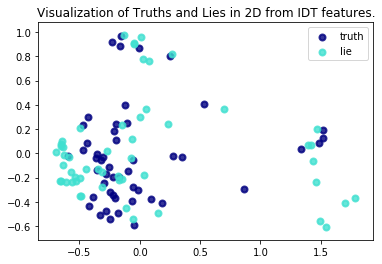

In [13]:
visualize_data(x, y, 'IDT')

# Perform experiments

In [ ]:
# perform hyperparameter search for IDT
idt_hyperparameter_map = {}
for C in [1e-4, 1e-3, 1e-2, 0.1, 0.5, 2, 10, 100]: # note that we tried more values. 
    clf = SVC(C=C, kernel='linear', probability=True)
    collect_results(x, y, y_sex, subjects, run_experiment_with_sex_labels, C, 
                    clf, idt_hyperparameter_map, use_predict=(not run_experiment_with_sex_labels), iterations=25)   